In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first = session.query(Station).first()
first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11be9b2b0>,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [11]:
test = engine.execute('select * from Measurement limit 15')
for row in test:
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)
(11, 'USC00519397', '2010-01-12', 0.0, 61.0)
(12, 'USC00519397', '2010-01-14', 0.0, 66.0)
(13, 'USC00519397', '2010-01-15', 0.0, 65.0)
(14, 'USC00519397', '2010-01-16', 0.0, 68.0)
(15, 'USC00519397', '2010-01-17', 0.0, 64.0)


# Exploratory Climate Analysis

In [12]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [13]:
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year)

2016-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
rainfall = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year).\
    order_by(Measurement.date).all()



In [15]:
dfrain = pd.DataFrame(rainfall)
dfrain.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


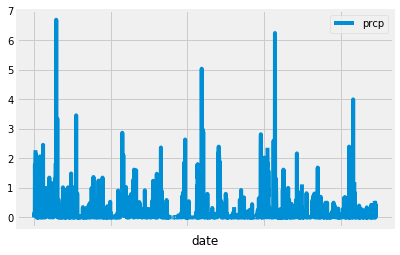

In [16]:
dfrain.plot("date", "prcp")

In [17]:
dfrain.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
number = session.query(Station).group_by(Station.id).count()
print(number)

9


In [19]:
results = engine.execute('select * from Station')
for row in results:
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [20]:
first = session.query(Station).first()
first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11be9b2b0>,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
for row in session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()):
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()

In [24]:
temps_df = pd.DataFrame(temps)
temps_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


Text(0.5, 0, 'TOBS')

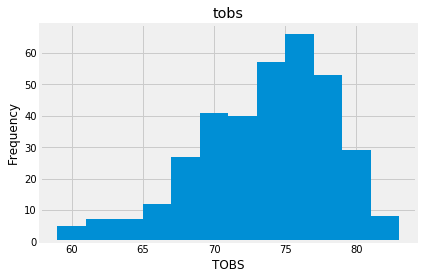

In [25]:
temps_df.hist(bins=12)
plt.ylabel("Frequency")
plt.xlabel("TOBS")

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_temps = calc_temps('2017-05-03', '2017-05-13')
my_temps

[(66.0, 75.39344262295081, 80.0)]

In [28]:
tmin = 66
tavg = 75.39344
tmax = 80

Text(0, 0.5, 'Temp (F)')

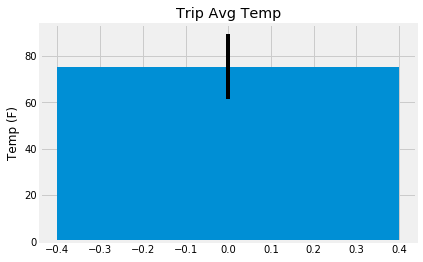

In [29]:
x_pos = np.arange(len(my_temps))
plt.bar(x_pos, tavg, yerr=(tmax - tmin))
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")

In [30]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(Measurement.station, func.sum(Measurement.prcp)).\
    group_by(Measurement.station).\
    filter(Measurement.date >= '2017-05-03').\
    filter(Measurement.date <= '2017-05-13').\
    order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00519281', 2.8000000000000003),
 ('USC00516128', 2.6600000000000006),
 ('USC00513117', 2.06),
 ('USC00514830', 1.9),
 ('USC00519523', 0.74),
 ('USC00519397', 0.01)]

In [31]:
joined = session.query(Measurement, Station).filter(Measurement.station == Station.station)
for record in joined:
    (Measurement, Station) = record
    print(Measurement.station)
    print(Station.station)

USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC0

USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC0

USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC00519397
USC0

USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC0

USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC0

USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC00513117
USC0

USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC0

USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC00514830
USC0

USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC00517948
USC0

USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC00518838
USC0

USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC0

USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC00519523
USC0

USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC0

USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC00519281
USC0

USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC0

USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC00511918
USC0

USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC0

USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC00516128
USC0

In [39]:
joined_df = pd.DataFrame(Measurement)

ValueError: DataFrame constructor not properly called!

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
